### Start a spark session

In [1]:
%pip install pyspark
import sys

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-sharing-spark_2.12:3.3.0") \
    .getOrCreate()

### List Tables
Use the provided config

In [3]:
import delta_sharing
config = "config.share"
client = delta_sharing.SharingClient(config)
client.list_all_tables()

[Table(name='ev3_device_data', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='cc_api_logs', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='ev3_dataprofile', share='start_hack_2025', schema='start_hack_2025')]

### Table 1
Energyvalve 3 dataprofile describing the datapoints found in the device data table.

In [4]:
df1 = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_dataprofile").limit(3)
df1.toPandas()

,id,access,basetype,description,format,name,privacy,restriction,definedBy,unit
0,evcloud.00009,r,int,Valve Type,application/vnd.belimo.enum;0|1,ValveType,False,uint8,evcloud/1.2,None
1,evcloud.10,r,int,DN Size of Valve,None,DN_Size,False,int32,evcloud/1.2,None
2,evcloud.100,r,real,Relative Flow in %,None,RelFlow_Fb_Rel2Vmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent


### Table 2
Energyvalve 3 device data. **Big data** list of timeseries samples for devices. Devices are differentiated by the **device_id** column.

In [8]:
df2 = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").limit(300000)
df2.toPandas()

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-09 09:40:34.098,2019-06-09 09:38:32.312000,2019,201906,20190609,2019-06-09_09.gz,349.924869,323.425260,...,10.000000,0.0,91.900002,2.0,0.0,26.499609,4.940656e-324,2278.438304,9454.135186,NaN
1,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-18 23:18:23.274,2019-06-18 23:17:21.806000,2019,201906,20190618,2019-06-18_23.gz,349.945812,323.440885,...,5.000000,0.0,19.700001,2.0,0.0,26.504926,4.940656e-324,2508.085700,10513.017983,NaN
2,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 03:36:49.933,2019-06-17 03:33:48.073000,2019,201906,20190617,2019-06-17_03.gz,351.181414,324.487760,...,5.000000,0.0,31.400000,2.0,0.0,26.693653,1.361569e-04,2484.714193,35993.262013,NaN
3,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 08:18:08.063,2019-06-17 08:14:02.385000,2019,201906,20190617,2019-06-17_08.gz,351.181414,324.503385,...,5.000000,0.0,90.000000,2.0,0.0,26.678028,6.197484e-05,2489.384833,36060.931995,NaN
4,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 02:22:01.103,2019-06-08 02:19:29.379000,2019,201906,20190608,2019-06-08_02.gz,349.935340,323.427865,...,5.000000,0.0,25.500000,2.0,0.0,26.507476,4.940656e-324,2247.120865,9321.962749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-11 11:03:38.354,2019-06-11 11:00:47.288000,2019,201906,20190611,2019-06-11_11.gz,349.016754,323.961719,...,6.951430,0.0,79.699997,4.0,0.0,25.055035,5.906202e-17,2310.639063,20607.191401,NaN
299996,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-23 15:41:17.112,2019-06-23 15:40:15.924000,2019,201906,20190623,2019-06-23_15.gz,349.008901,323.953906,...,6.436319,0.0,33.400002,4.0,0.0,25.054994,2.848194e-34,2601.231446,23576.271271,NaN
299997,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-01 13:49:16.849,2019-06-01 13:45:30.985999,2019,201906,20190601,2019-06-01_13.gz,349.024607,323.966927,...,16.201959,0.0,70.400002,4.0,0.0,25.057680,2.414547e-07,2076.574181,17811.728517,NaN
299998,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-01 20:18:54.392,2019-06-01 20:17:37.136999,2019,201906,20190601,2019-06-01_20.gz,349.019372,323.964323,...,0.041011,0.0,16.299999,4.0,0.0,25.055049,4.265999e-05,2082.993471,17885.371350,NaN


In [9]:
# Count distinct device_id values
unique_device_ids_count = df2.select("device_id").distinct().count()
print("Number of unique device_id:", unique_device_ids_count)


Number of unique device_id: 41


### Plot
Heat Exchanger Characteristic

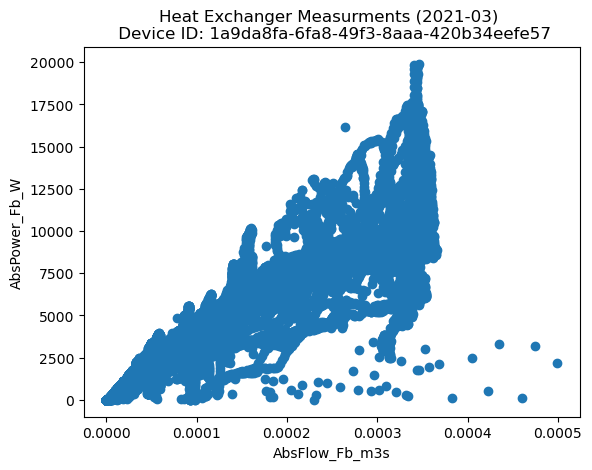

In [8]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_month = "202103"
x = "AbsFlow_Fb_m3s"
y = "AbsPower_Fb_W"
df2_data = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").filter((col("device_id") == device_id) & (col("year_month") == year_month)).toPandas()
year_month = year_month[:4] + '-' + year_month[4:]
plt.scatter(df2_data[x], df2_data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Heat Exchanger Measurments ({year_month}) \n Device ID: {device_id}")
plt.show()

### Table 3
Cloud api logs describing interactions with our cloud.

In [9]:
df3 = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.cc_api_logs").limit(3)
df3.toPandas()

,api,class,cloudEnv,component,correlationId,developmentDevice,durationInMs,host,httpStatus,logEnv,...,principal,requestId,requestURI,requestURL,signature,signatureFull,signatureId,threadName,userAgent,timestamp
0,device,None,production,core-cloud,CCB:9ae22714-7c8c-4490-8f07-d5fd7793b6cf,NaN,119,logsearch-lifeline-agent-stateful-0.logsearch-...,401,production,...,None,a3818cc09b0af2d7c72134ca5fa93eda,/device-api/registration,https://connect.g2bcc.com/device-api/registration,None,None,None,http-nio-8080-exec-29,"sharedlogic/3.22.5-0 (bsp 10.8.0-0, model 1.2....",2025-01-16 07:45:23.365
1,device,DeviceApiV2DeviceController,production,core-cloud,CCB:fc660e65-b629-4ca1-9adc-ac91cd3fb090,NaN,24,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,4d284824-f2dc-4e47-9641-9c4bd115fbab,db0062793fb9ee45787e4588891f15dc,/device-api/v2/devices/8acbcbb2-0649-429b-b09b...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-93,,2025-01-16 07:45:23.450
2,device,DeviceApiV2DeviceController,production,core-cloud,CCB:6cb197c0-6be1-4e49-82f4-90539ab6ded2,NaN,23,logsearch-lifeline-agent-stateful-0.logsearch-...,200,production,...,d68a34f0-379c-4534-84e9-0278b8539c11,93df335640a41a3e4b1ecc00a4e58304,/device-api/v2/devices/fec4211e-1d9a-41c8-820d...,https://connect.g2bcc.com/device-api/v2/device...,DeviceApiV2DeviceController.getTaskList(String...,ch.belimo.cloud.server.deviceapi.v2.DeviceApiV...,111elm3x3ote5,http-nio-8080-exec-146,,2025-01-16 07:45:23.452


In [ ]:
#Table 1

In [10]:
df_dataprofile_pd = df1.toPandas()
# Print all columns
print("All columns in df_dataprofile_pd:")
print(df_dataprofile_pd.columns.tolist())

# Filter and print only numeric columns (this might be more relevant for a histogram)
numeric_columns = df_dataprofile_pd.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:")
print(numeric_columns)


All columns in df_dataprofile_pd:
['id', 'access', 'basetype', 'description', 'format', 'name', 'privacy', 'restriction', 'definedBy', 'unit']
Numeric columns:
[]


In [11]:
# Read the ev3_dataprofile Delta Sharing table using Spark
df_dataprofile = spark.read.format("deltaSharing") \
    .load("config.share#start_hack_2025.start_hack_2025.ev3_dataprofile")

# Convert to a Pandas DataFrame for easier EDA (if dataset is small enough)
df_dataprofile_pd = df_dataprofile.toPandas()


In [12]:
# Display the first few rows
print(df_dataprofile_pd.head())

# Get summary statistics for numeric columns
print(df_dataprofile_pd.describe())

# Check for missing values
print(df_dataprofile_pd.isnull().sum())


              id access basetype               description  \
0  evcloud.00009      r      int                Valve Type   
1     evcloud.10      r      int          DN Size of Valve   
2    evcloud.100      r     real        Relative Flow in %   
3    evcloud.110      r     real     Absolute Flow in m3/s   
4    evcloud.120     rw     real  Maximum Power Limit in %   

                            format                 name  privacy  \
0  application/vnd.belimo.enum;0|1            ValveType    False   
1                             None              DN_Size    False   
2                             None  RelFlow_Fb_Rel2Vmax    False   
3                             None       AbsFlow_Fb_m3s    False   
4                             None       Pmax_Rel_Write    False   

                  restriction    definedBy                 unit  
0                       uint8  evcloud/1.2                 None  
1                       int32  evcloud/1.2                 None  
2  [-2147483.648,214

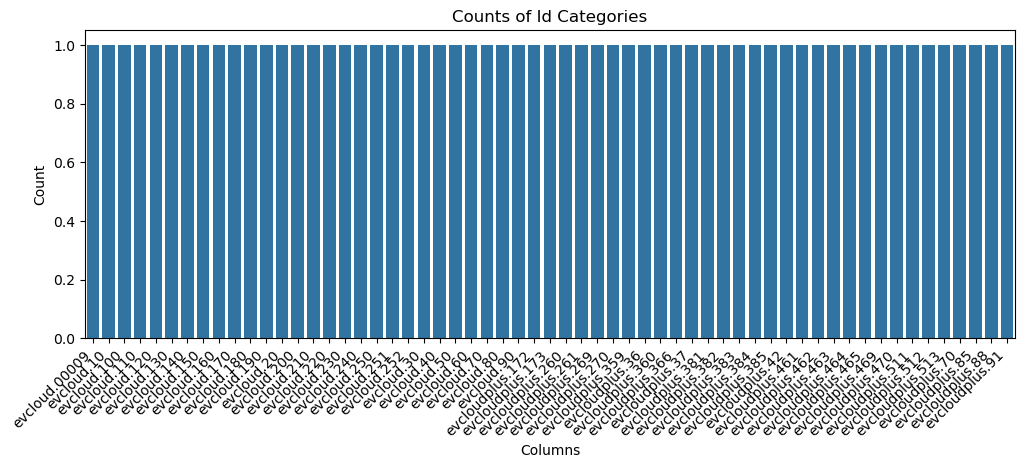

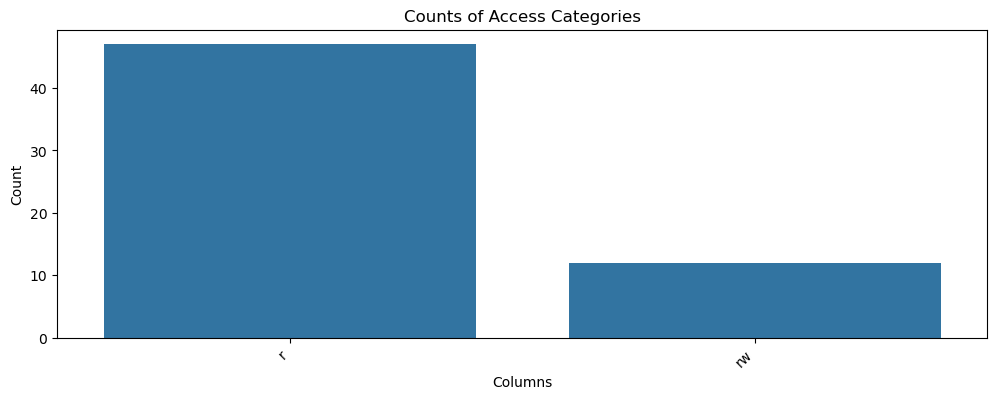

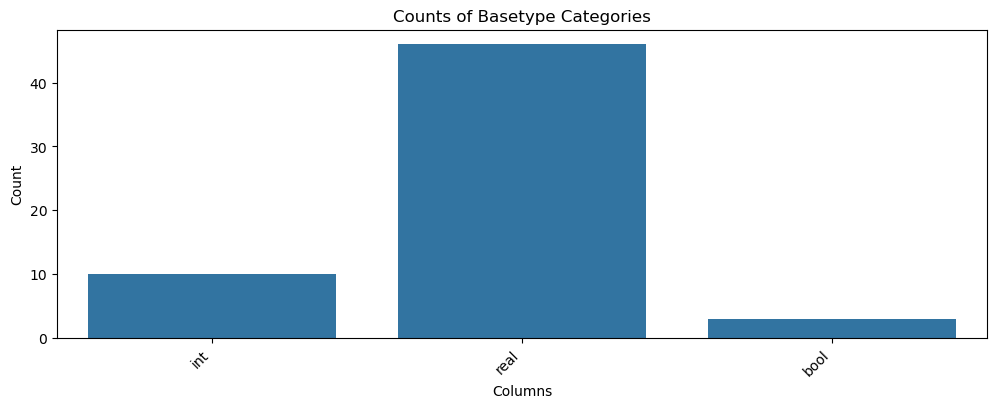

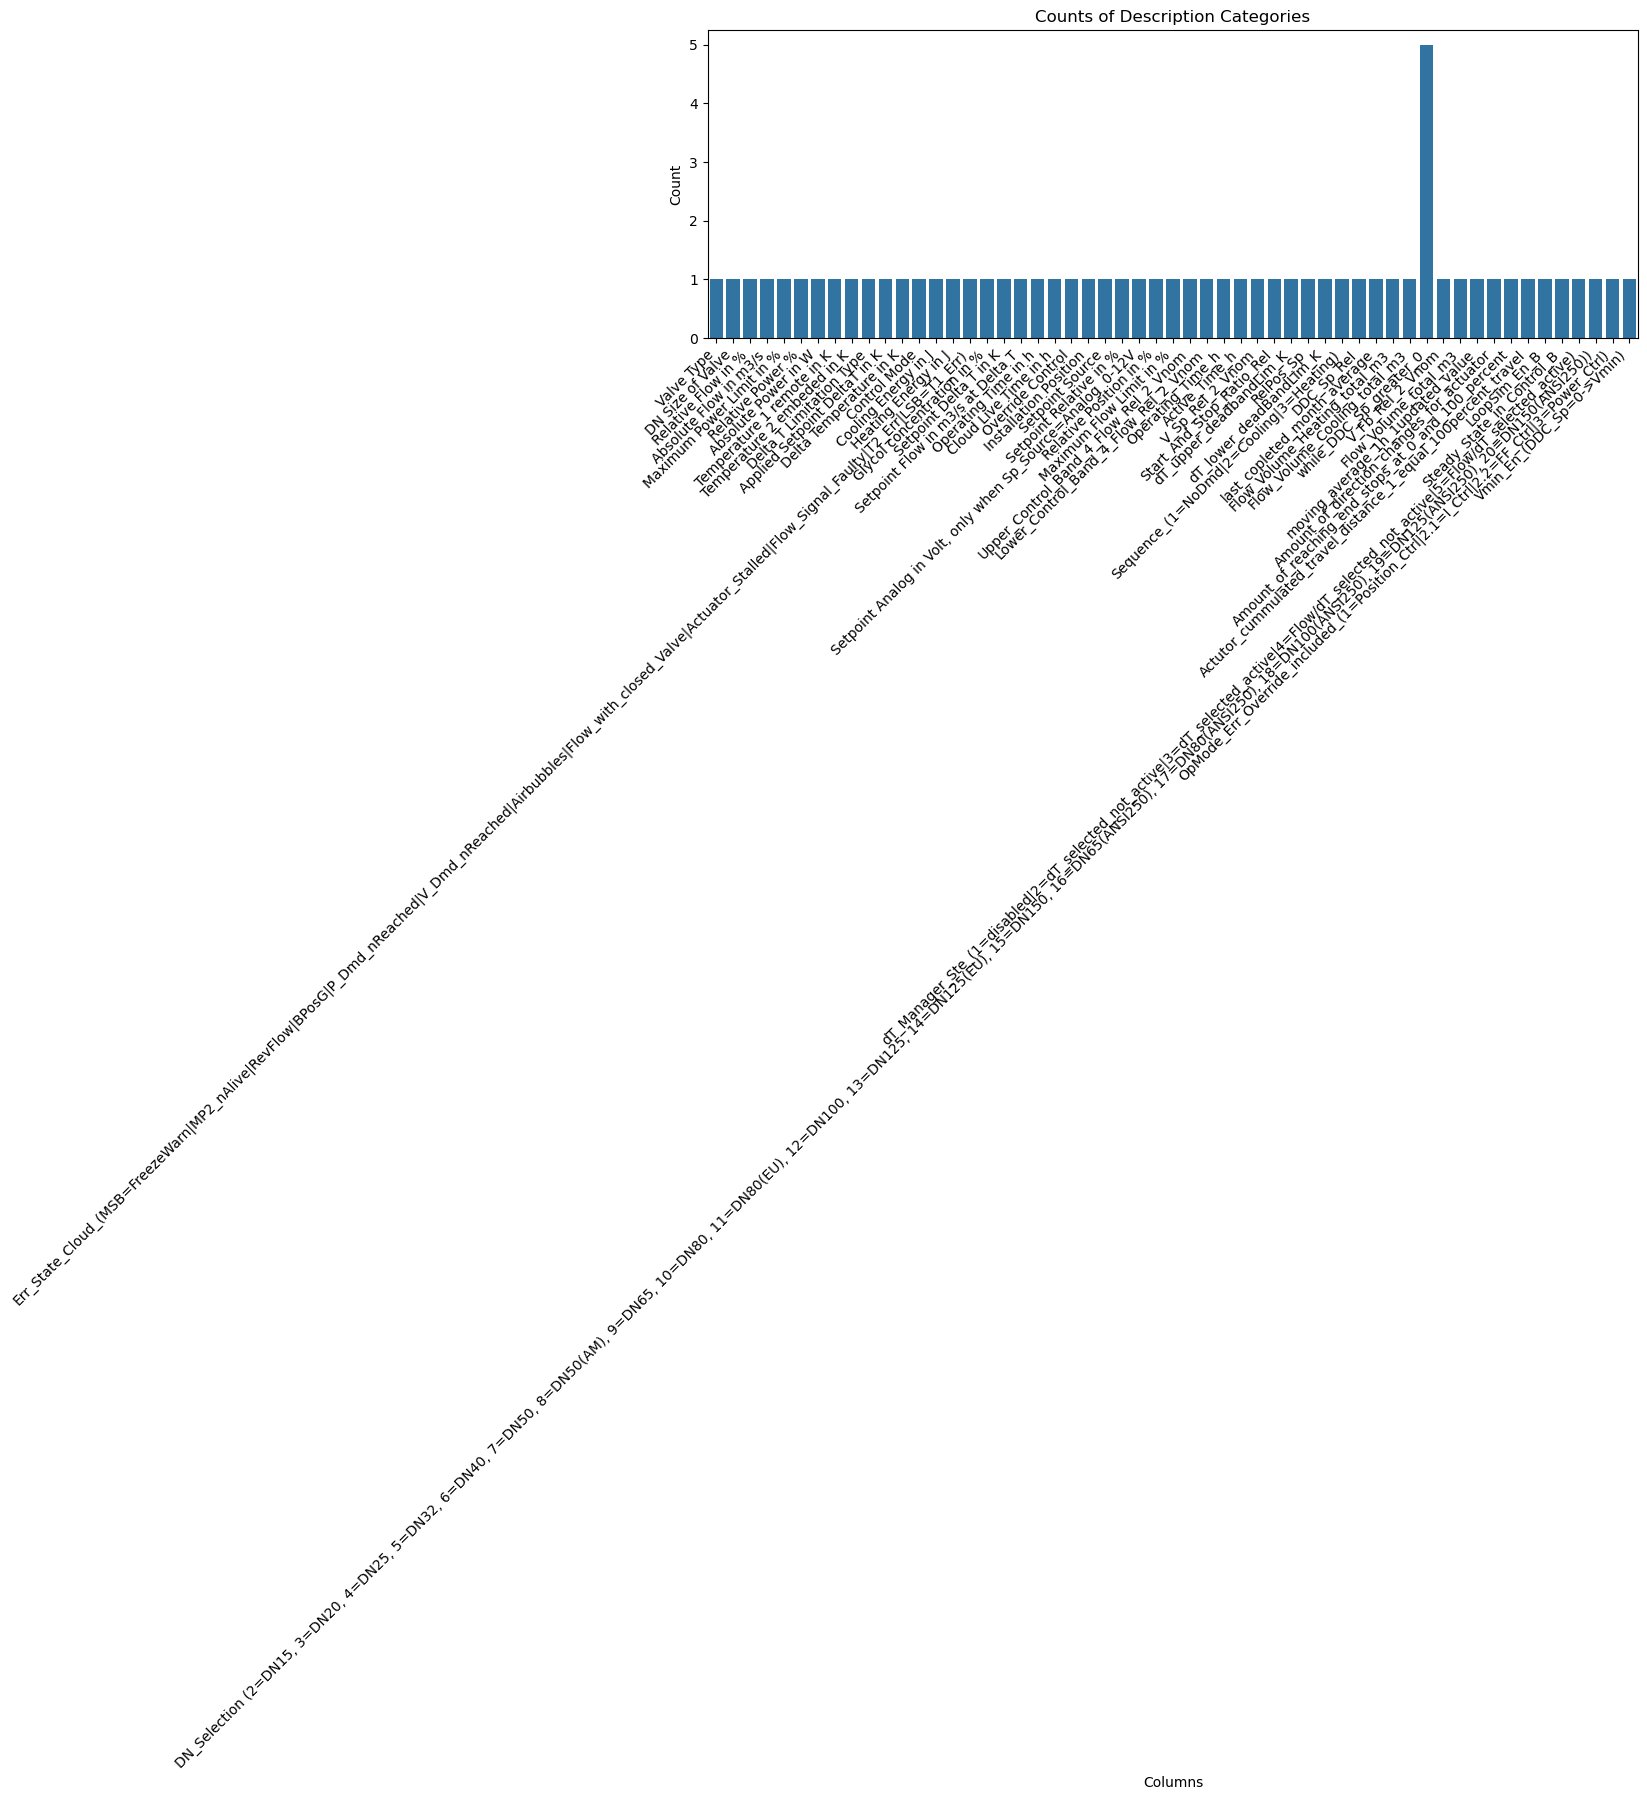

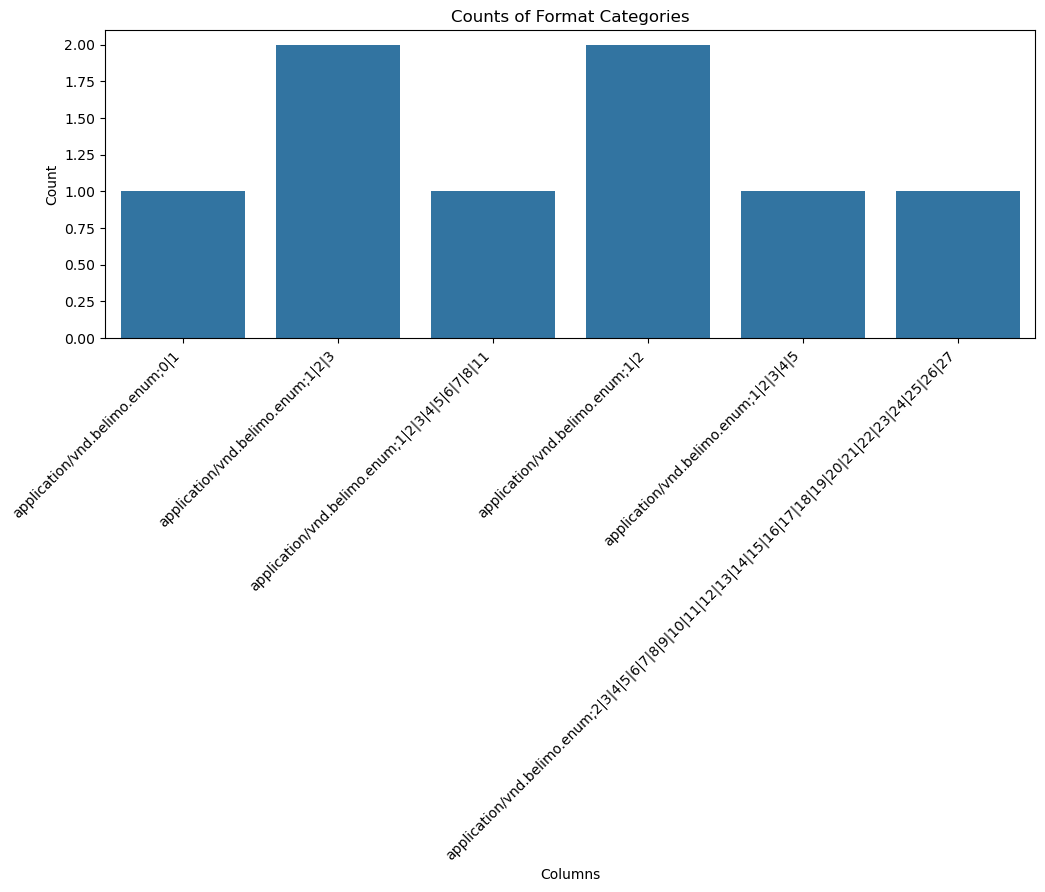

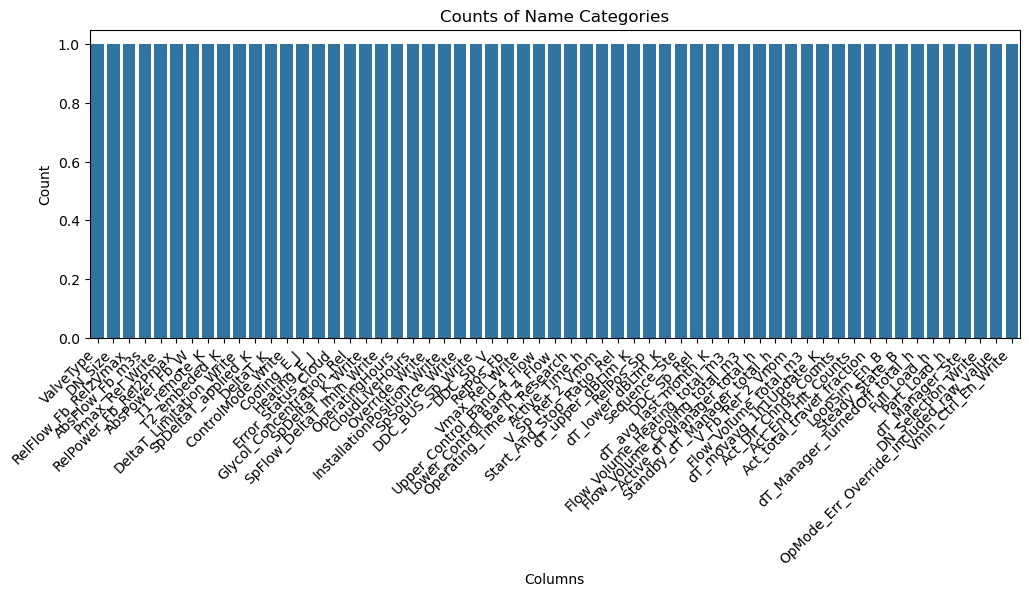

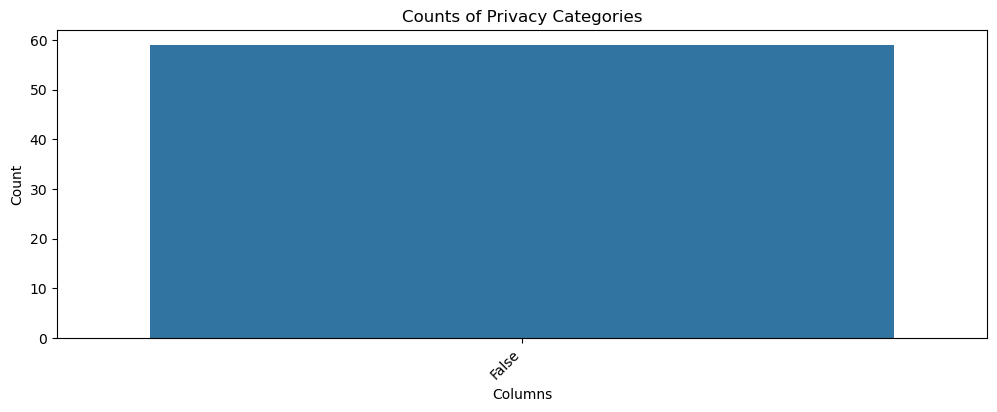

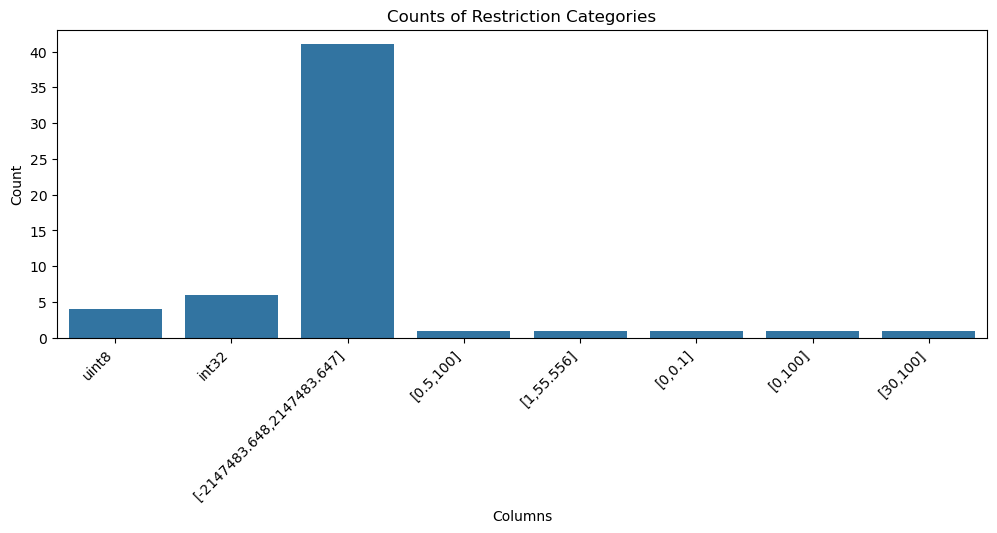

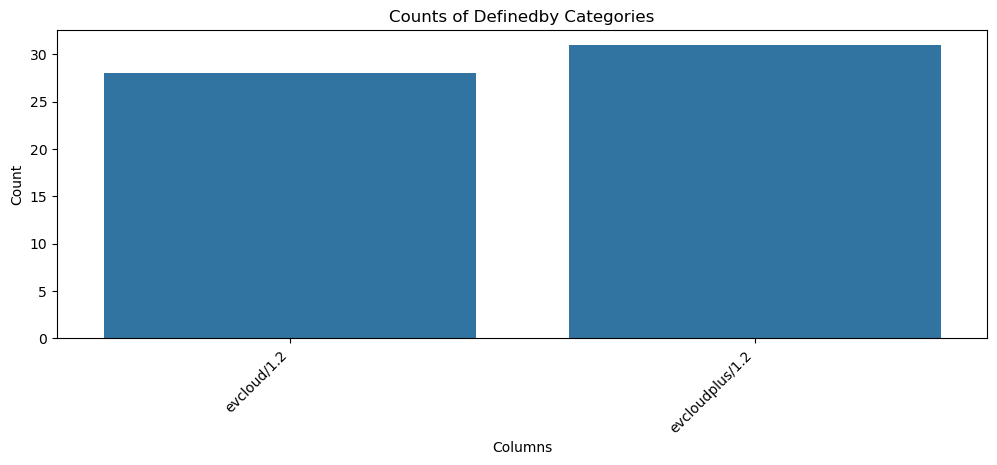

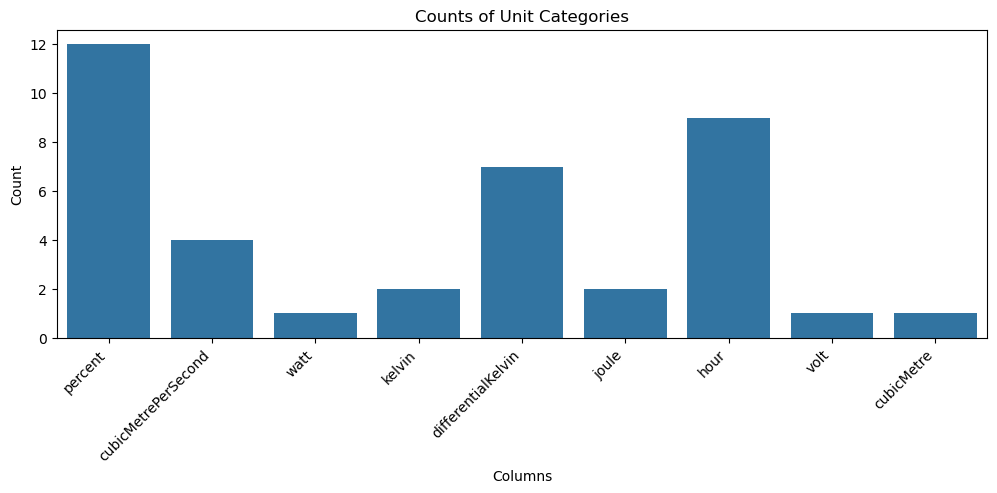

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
columns = ['id', 'access', 'basetype', 'description', 'format', 'name', 'privacy', 'restriction', 'definedBy', 'unit']

# Loop through each column and generate a count plot
for col in columns:
    plt.figure(figsize=(12, 4))  # Set figure size
    sns.countplot(data=df_dataprofile_pd, x=col)  # Create count plot
    plt.title(f"Counts of {col.capitalize()} Categories")  # Dynamic title
    plt.xlabel("Columns")  # X-axis label
    plt.ylabel("Count")  # Y-axis label
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.show()  # Display plot


In [ ]:
#Table 2

In [127]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Create or retrieve SparkSession (already done above, shown for completeness)
spark = SparkSession \
    .builder \
    .appName("Dataset2 EDA") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-sharing-spark_2.12:3.3.0") \
    .getOrCreate()

# 2) Read the 'ev3_device_data' table (adjust .limit(...) or remove it if you want the full dataset)
df_device_data = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .limit(30000)  # limit for demonstration
)

# 3) Convert to Pandas
df_device_data_pd = df_device_data.toPandas()
print("Dataframe loaded with shape:", df_device_data_pd.shape)


Dataframe loaded with shape: (30000, 38)


In [15]:
# Print columns
print("\nColumns in df_device_data_pd:\n", df_device_data_pd.columns.tolist())

# Peek at the first few rows
print("\nHead of df_device_data_pd:\n", df_device_data_pd.head())

# DataFrame info (types, non-null counts)
print("\nInfo:\n")
df_device_data_pd.info()

# Summary statistics for numeric columns
print("\nDescriptive statistics (numeric only):\n", df_device_data_pd.describe())

# Check for missing values
print("\nMissing values:\n", df_device_data_pd.isnull().sum())



Columns in df_device_data_pd:
 ['device_id', 'dataprofile_id', 'cloud_received_time', 'sample_time', 'year', 'year_month', 'year_month_day', 'influx_migration_source_filename', 'T1_remote_K', 'T2_embeded_K', 'RelFlow_Fb_Rel2Vmax', 'RelPower_Fb_Rel2Pmax', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'Heating_E_J', 'Glycol_Concentration_Rel', 'ControlMode_Write', 'Cooling_E_J', 'RelPos_Fb', 'DeltaT_Limitation_Write', 'SpDeltaT_K_Write', 'Pmax_Rel_Write', 'Vmax_Rel_Write', 'InstallationPosition_Write', 'Override_Write', 'DN_Size', 'SpFlow_DeltaT_lmin_Write', 'DDC_Sp_Rel', 'SpDeltaT_applied_K', 'Error_Status_Cloud', 'DDC_BUS_Sp_Write', 'dT_Manager_Ste', 'Active_dT_Manager_total_h', 'DeltaT_K', 'DDC_Sp_V', 'OperatingHours', 'Flow_Volume_total_m3', 'Y3AnalogInputValue']

Head of df_device_data_pd:
                               device_id     dataprofile_id  \
0  14e5bc06-9e32-4938-96df-82a070581e7d  energyvalve3/1.11   
1  14e5bc06-9e32-4938-96df-82a070581e7d  energyvalve3/1.11   
2  15cbf304-2834-45


Numeric columns:
 ['T1_remote_K', 'T2_embeded_K', 'RelFlow_Fb_Rel2Vmax', 'RelPower_Fb_Rel2Pmax', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'Heating_E_J', 'Glycol_Concentration_Rel', 'ControlMode_Write', 'Cooling_E_J', 'RelPos_Fb', 'DeltaT_Limitation_Write', 'SpDeltaT_K_Write', 'Pmax_Rel_Write', 'Vmax_Rel_Write', 'InstallationPosition_Write', 'Override_Write', 'DN_Size', 'SpFlow_DeltaT_lmin_Write', 'DDC_Sp_Rel', 'SpDeltaT_applied_K', 'Error_Status_Cloud', 'DDC_BUS_Sp_Write', 'dT_Manager_Ste', 'Active_dT_Manager_total_h', 'DeltaT_K', 'DDC_Sp_V', 'OperatingHours', 'Flow_Volume_total_m3', 'Y3AnalogInputValue']


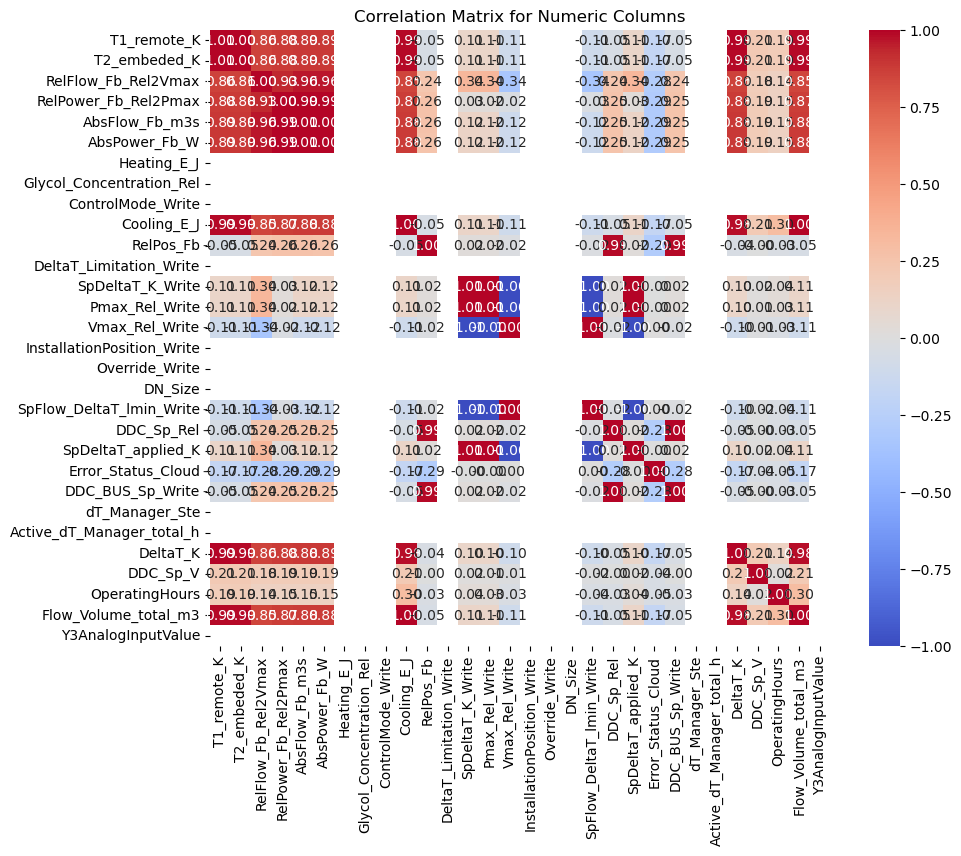

In [16]:
# Filter numeric columns
numeric_cols = df_device_data_pd.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:\n", numeric_cols)

# Create a correlation matrix
if numeric_cols:
    corr_matrix = df_device_data_pd[numeric_cols].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix for Numeric Columns")
    plt.show()
else:
    print("No numeric columns found for correlation matrix.")


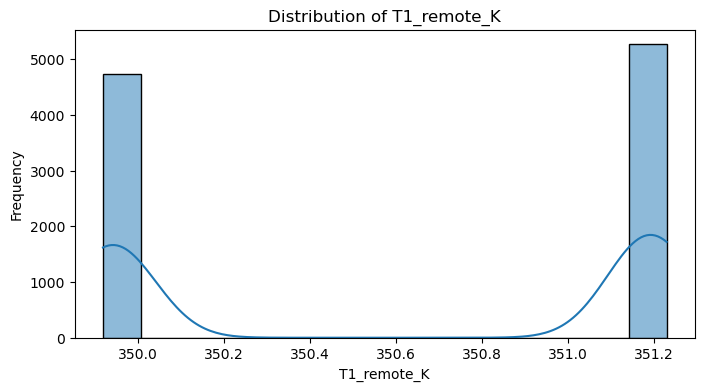

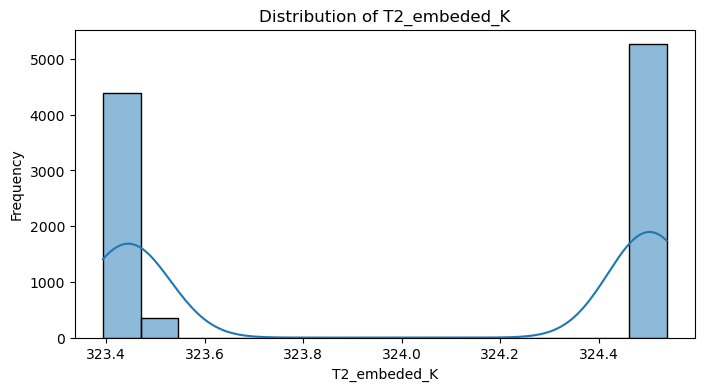

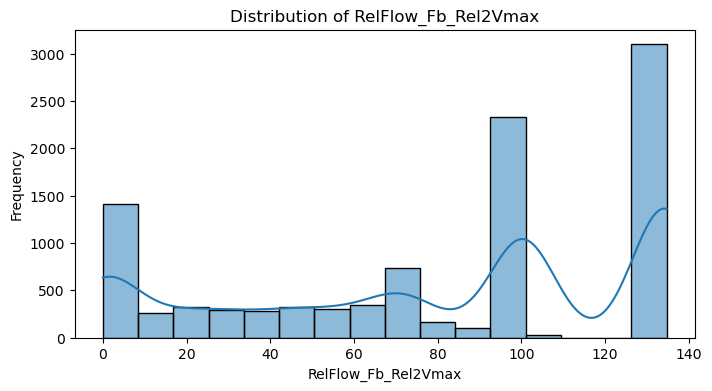

In [ ]:
for col_name in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_device_data_pd[col_name], kde=True)
    plt.title(f"Distribution of {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
if len(numeric_cols) > 1:
    sns.pairplot(df_device_data_pd[numeric_cols], diag_kind="kde")
    plt.suptitle("Pairwise Scatter Plots of Numeric Columns", y=1.02)
    plt.show()


In [ ]:
# Example filter
device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_month = "202103"

# Convert year_month to YYYY-MM
year_month_formatted = year_month[:4] + '-' + year_month[4:]

df_filtered_pd = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .filter((col("device_id") == device_id) & (col("year_month") == year_month))
    .toPandas()
)

print("Filtered data shape:", df_filtered_pd.shape)
print(df_filtered_pd.head())

# Example numeric pairs (customize these based on your columns)
scatter_pairs = [
    ("AbsFlow_Fb_m3s", "AbsPower_Fb_W"),
    ("RelFlow_Fb_m3s", "RelPower_Fb_W"),
    # Add more pairs if they exist, e.g. ("Temperature_In_C", "Temperature_Out_C")
]

for x_col, y_col in scatter_pairs:
    if x_col in df_filtered_pd.columns and y_col in df_filtered_pd.columns:
        plt.figure(figsize=(8, 5))
        plt.scatter(df_filtered_pd[x_col], df_filtered_pd[y_col], alpha=0.6, edgecolors='k')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f"Scatter Plot: {x_col} vs. {y_col}\n"
                  f"Device ID: {device_id}, Month: {year_month_formatted}")
        plt.grid(True)
        plt.show()
    else:
        print(f"Skipping pair ({x_col}, {y_col}) - columns not found in dataset.")


In [ ]:
### Table 2 Models

In [128]:
df_pandas = df2.toPandas()
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   device_id                         30000 non-null  object        
 1   dataprofile_id                    30000 non-null  object        
 2   cloud_received_time               30000 non-null  datetime64[ns]
 3   sample_time                       30000 non-null  datetime64[ns]
 4   year                              30000 non-null  object        
 5   year_month                        30000 non-null  object        
 6   year_month_day                    30000 non-null  object        
 7   influx_migration_source_filename  30000 non-null  object        
 8   T1_remote_K                       29999 non-null  float64       
 9   T2_embeded_K                      29999 non-null  float64       
 10  RelFlow_Fb_Rel2Vmax               29999 non-nu

In [43]:
print(df_pandas.columns.tolist())

['device_id', 'dataprofile_id', 'cloud_received_time', 'sample_time', 'year', 'year_month', 'year_month_day', 'influx_migration_source_filename', 'T1_remote_K', 'T2_embeded_K', 'RelFlow_Fb_Rel2Vmax', 'RelPower_Fb_Rel2Pmax', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'Heating_E_J', 'Glycol_Concentration_Rel', 'ControlMode_Write', 'Cooling_E_J', 'RelPos_Fb', 'DeltaT_Limitation_Write', 'SpDeltaT_K_Write', 'Pmax_Rel_Write', 'Vmax_Rel_Write', 'InstallationPosition_Write', 'Override_Write', 'DN_Size', 'SpFlow_DeltaT_lmin_Write', 'DDC_Sp_Rel', 'SpDeltaT_applied_K', 'Error_Status_Cloud', 'DDC_BUS_Sp_Write', 'dT_Manager_Ste', 'Active_dT_Manager_total_h', 'DeltaT_K', 'DDC_Sp_V', 'OperatingHours', 'Flow_Volume_total_m3', 'Y3AnalogInputValue']


In [44]:
import pandas as pd
selected_features = [
    "device_id", "cloud_received_time", "sample_time", "T1_remote_K", "T2_embeded_K",
    "RelFlow_Fb_Rel2Vmax", "RelPower_Fb_Rel2Pmax", "AbsFlow_Fb_m3s", "AbsPower_Fb_W",
    "Heating_E_J", "Cooling_E_J", "RelPos_Fb", "DeltaT_K",
    "OperatingHours", "Error_Status_Cloud", "Flow_Volume_total_m3"
]

# Select only these columns
df_pandas = df_pandas[selected_features]
df_pandas.head()

,device_id,cloud_received_time,sample_time,T1_remote_K,T2_embeded_K,RelFlow_Fb_Rel2Vmax,RelPower_Fb_Rel2Pmax,AbsFlow_Fb_m3s,AbsPower_Fb_W,Heating_E_J,Cooling_E_J,RelPos_Fb,DeltaT_K,OperatingHours,Error_Status_Cloud,Flow_Volume_total_m3
0,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-09 09:40:34.098,2019-06-09 09:38:32.312,349.924869,323.425260,94.325362,3101.045821,0.002830,310104.582066,0.0,1.035416e+12,92.03,26.499609,2278.438304,0.0,9454.135186
1,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-18 23:18:23.274,2019-06-18 23:17:21.806,349.945812,323.440885,0.000000,0.000000,0.000000,0.000000,0.0,1.151466e+12,19.78,26.504926,2508.085700,0.0,10513.017983
2,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 03:36:49.933,2019-06-17 03:33:48.073,351.181414,324.487760,100.613720,4934.568909,0.004025,444111.201850,0.0,3.971631e+12,31.22,26.693653,2484.714193,0.0,35993.262013
3,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 08:18:08.063,2019-06-17 08:14:02.385,351.181414,324.503385,100.613720,4931.649279,0.004025,443848.435080,0.0,3.979098e+12,90.06,26.678028,2489.384833,0.0,36060.931995
4,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-08 02:22:01.103,2019-06-08 02:19:29.379,349.935340,323.427865,0.000000,0.000000,0.000000,0.000000,0.0,1.020931e+12,25.41,26.507476,2247.120865,0.0,9321.962749


In [45]:
# Function to convert error number to bit string
def error_to_bit_string(error_value, num_bits=12):
    return format(int(error_value), f'0{num_bits}b')[::-1]  # Convert to binary & reverse bits

# Apply conversion to DataFrame
df_pandas["Error_Bit_String"] = df_pandas["Error_Status_Cloud"].fillna(0).apply(error_to_bit_string)

# Show results
df_pandas[["Error_Status_Cloud", "Error_Bit_String"]].head()


,Error_Status_Cloud,Error_Bit_String
0,0.0,000000000000
1,0.0,000000000000
2,0.0,000000000000
3,0.0,000000000000
4,0.0,000000000000


In [46]:
# Define error labels based on bit positions
error_labels = [
    "T1_Err", "T2_Err", "Flow_Signal_Faulty", "Actuator_Stalled",
    "Flow_with_closed_Valve", "Airbubbles", "V_Dmd_nReached", "P_Dmd_nReached",
    "BPosG", "RevFlow", "MP2_nAlive", "FreezeWarn"
]

# Function to decode errors
def decode_errors(bit_string):
    return {error_labels[i]: int(bit_string[i]) for i in range(len(error_labels))}

# Apply decoding function
error_df = df_pandas["Error_Bit_String"].apply(decode_errors).apply(pd.Series)

# Merge with main DataFrame
df_pandas = pd.concat([df_pandas, error_df], axis=1)

# Show results
df_pandas.head()


,device_id,cloud_received_time,sample_time,T1_remote_K,T2_embeded_K,RelFlow_Fb_Rel2Vmax,RelPower_Fb_Rel2Pmax,AbsFlow_Fb_m3s,AbsPower_Fb_W,Heating_E_J,...,Flow_Signal_Faulty,Actuator_Stalled,Flow_with_closed_Valve,Airbubbles,V_Dmd_nReached,P_Dmd_nReached,BPosG,RevFlow,MP2_nAlive,FreezeWarn
0,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-09 09:40:34.098,2019-06-09 09:38:32.312,349.924869,323.425260,94.325362,3101.045821,0.002830,310104.582066,0.0,...,0,0,0,0,0,0,0,0,0,0
1,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-18 23:18:23.274,2019-06-18 23:17:21.806,349.945812,323.440885,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 03:36:49.933,2019-06-17 03:33:48.073,351.181414,324.487760,100.613720,4934.568909,0.004025,444111.201850,0.0,...,0,0,0,0,0,0,0,0,0,0
3,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 08:18:08.063,2019-06-17 08:14:02.385,351.181414,324.503385,100.613720,4931.649279,0.004025,443848.435080,0.0,...,0,0,0,0,0,0,0,0,0,0
4,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-08 02:22:01.103,2019-06-08 02:19:29.379,349.935340,323.427865,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_pandas = df_pandas.loc[:, ~df_pandas.columns.duplicated()]

In [48]:
# Filter the dataset for devices that experienced "Flow_with_closed_Valve" error
devices_with_issue = df_pandas[df_pandas["Flow_with_closed_Valve"] == 1]["device_id"].unique()

# Convert to DataFrame for better readability
devices_with_issue

array(['15cbf304-2834-4523-81d1-45c0bbc0f849'], dtype=object)

In [49]:
print(df_pandas.columns[df_pandas.columns.duplicated()])


Index([], dtype='object')


In [50]:
device_data = df_pandas[df_pandas["device_id"] == "15cbf304-2834-4523-81d1-45c0bbc0f849"]
device_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5263 entries, 2 to 9999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   device_id               5263 non-null   object        
 1   cloud_received_time     5263 non-null   datetime64[ns]
 2   sample_time             5263 non-null   datetime64[ns]
 3   T1_remote_K             5263 non-null   float64       
 4   T2_embeded_K            5263 non-null   float64       
 5   RelFlow_Fb_Rel2Vmax     5263 non-null   float64       
 6   RelPower_Fb_Rel2Pmax    5263 non-null   float64       
 7   AbsFlow_Fb_m3s          5263 non-null   float64       
 8   AbsPower_Fb_W           5263 non-null   float64       
 9   Heating_E_J             5263 non-null   float64       
 10  Cooling_E_J             5263 non-null   float64       
 11  RelPos_Fb               5263 non-null   float64       
 12  DeltaT_K                5263 non-null   float64      

In [51]:
# Select relevant features (exclude device_id and timestamps)
features = [
    "T1_remote_K", "T2_embeded_K", "RelFlow_Fb_Rel2Vmax", "RelPower_Fb_Rel2Pmax", 
    "AbsFlow_Fb_m3s", "AbsPower_Fb_W", "Heating_E_J", "Cooling_E_J", 
    "RelPos_Fb", "DeltaT_K", "OperatingHours", "Flow_Volume_total_m3"
]

# Define X (independent variables) and y (target variable)
X = device_data[features]
y = device_data["Flow_with_closed_Valve"]


In [52]:
# Check for missing values
print(X.isnull().sum())

# Fill missing values with the column median (or use mean)
X = X.fillna(X.median())


T1_remote_K             0
T2_embeded_K            0
RelFlow_Fb_Rel2Vmax     0
RelPower_Fb_Rel2Pmax    0
AbsFlow_Fb_m3s          0
AbsPower_Fb_W           0
Heating_E_J             0
Cooling_E_J             0
RelPos_Fb               0
DeltaT_K                0
OperatingHours          0
Flow_Volume_total_m3    0
dtype: int64


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1053

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [ ]:
# ARIMA Model

In [109]:
from pyspark.sql.functions import col

# Define filter parameters
device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
start_date = "2021-03-01"
end_date   = "2021-03-5"

# Read, filter, order, and limit the data
df_arima = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .filter(
        (col("device_id") == device_id) &
        (col("sample_time") >= start_date) &
        (col("sample_time") <= end_date)
    )
    .orderBy("sample_time")
    .limit(10000)
)

# Convert Spark DataFrame to Pandas
df_arima_pandas = df_arima.toPandas()

# Quick check
print("Shape of filtered data:", df_arima_pandas.shape)
df_arima_pandas.head()


Shape of filtered data: (10000, 38)


,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-03-01 00:01:14.583,2021-03-01 00:00:13.188,2021,202103,20210301,2021-03-01_00.gz,297.176804,297.992526,...,6.0,0.0,100.0,1,0.0,0.815722,0.012601,8124.475818,590.601856,NaN
1,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-03-01 00:01:14.583,2021-03-01 00:00:43.346,2021,202103,20210301,2021-03-01_00.gz,297.169072,297.984794,...,6.0,0.0,100.0,1,0.0,0.815722,0.022625,8124.484191,590.601856,NaN
2,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-03-01 00:01:14.583,2021-03-01 00:01:13.516,2021,202103,20210301,2021-03-01_00.gz,297.171649,297.982216,...,6.0,0.0,100.0,1,0.0,0.810567,0.030004,8124.492505,590.601856,NaN
3,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-03-01 00:06:15.727,2021-03-01 00:01:43.633,2021,202103,20210301,2021-03-01_00.gz,297.169072,297.984794,...,6.0,0.0,100.0,1,0.0,0.815722,0.013333,8124.500951,590.601856,NaN
4,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-03-01 00:06:15.727,2021-03-01 00:02:13.856,2021,202103,20210301,2021-03-01_00.gz,297.176804,297.995103,...,6.0,0.0,100.0,1,0.0,0.818299,0.020131,8124.509263,590.601856,NaN


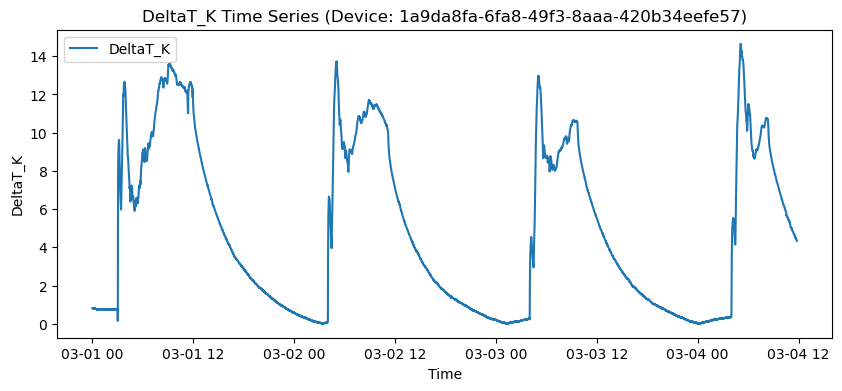

In [111]:
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# Convert sample_time to datetime, sort and set as index
df_arima_pandas['sample_time'] = pd.to_datetime(df_arima_pandas['sample_time'])
df_arima_pandas.sort_values(by='sample_time', inplace=True)
df_arima_pandas.set_index('sample_time', inplace=True)

# Extract the DeltaT_K time series
df_timeseries = df_arima_pandas[['DeltaT_K']].copy()

# Quick visualization
plt.figure(figsize=(10, 4))
plt.plot(df_timeseries.index, df_timeseries['DeltaT_K'], label='DeltaT_K')
plt.title("DeltaT_K Time Series (Device: {})".format("1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"))
plt.xlabel("Time")
plt.ylabel("DeltaT_K")
plt.legend()
plt.show()


In [91]:
df_timeseries = df_arima_pandas[['DeltaT_K']].copy().reset_index(drop=True)

# Split the data into training and testing sets (80%/20% split)
train_size = int(len(df_timeseries) * 0.8)
train_data = df_timeseries.iloc[:train_size]
test_data  = df_timeseries.iloc[train_size:]

# Import ARIMA and fit the model
from statsmodels.tsa.arima.model import ARIMA

# Use a simple ARIMA order (1,1,1) as a starting point.
p, d, q = 1, 1, 1
arima_model = ARIMA(train_data['DeltaT_K'], order=(p, d, q))
arima_result = arima_model.fit()
# Print model summary for diagnostics
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:               DeltaT_K   No. Observations:                 4023
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.000
Date:                Thu, 20 Mar 2025   AIC                              6.000
Time:                        19:09:49   BIC                             24.899
Sample:                             0   HQIC                            12.697
                               - 4023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.0

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1431: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


In [ ]:
#lSTM Model

In [97]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale the DeltaT_K values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_timeseries[['DeltaT_K']].values)

# Function to create sequences (windowed data) for LSTM input
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X_all, y_all = create_sequences(data_scaled, window_size=window_size)

In [98]:
# Split the sequences into training and testing sets (80%/20% split)
train_size_seq = int(len(X_all) * 0.8)
X_train = X_all[:train_size_seq]
y_train = y_all[:train_size_seq]
X_test  = X_all[train_size_seq:]
y_test  = y_all[train_size_seq:]

# Reshape for LSTM: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [100]:
%pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 8.1 MB/s eta 0:00:00:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 10.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 12.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 6.4 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 9.3 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0150 - val_loss: 2.8665e-04
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4296e-04 - val_loss: 2.3666e-04
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9206e-04 - val_loss: 2.1370e-04
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3627e-04 - val_loss: 2.3116e-04
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0353e-04 - val_loss: 1.4176e-04
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9110e-04 - val_loss: 1.0755e-04
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.4926e-04 - val_loss: 8.5077e-05
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9537e-05 - val_loss: 5.8638e-05
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0041e-04 - val_loss: 4.7210e-05
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.7083e-05 - val_loss: 4.1296e-05
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.

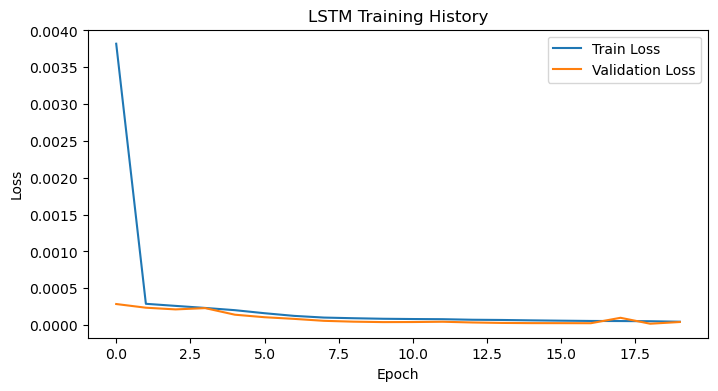

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1)

# Plot the training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Regression Metrics:
Mean Squared Error (MSE): 0.009161880739447006
Root Mean Squared Error (RMSE): 0.09571771382271417
Mean Absolute Error (MAE): 0.07425038292273231
R² Score: 0.999543133283652


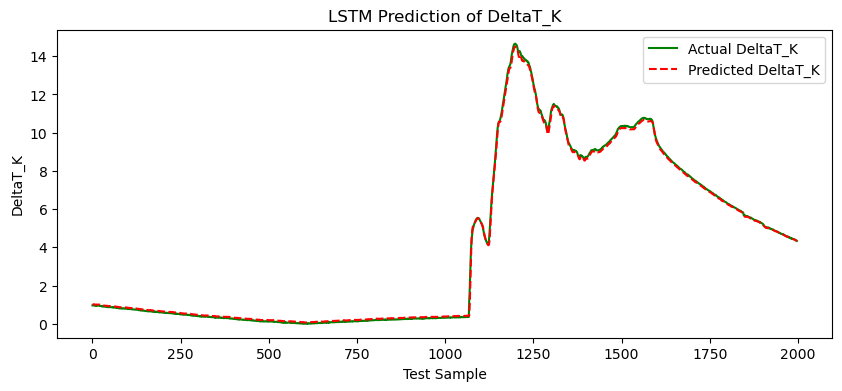

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume predictions_inv and y_test_inv have been computed as below:
# predictions_inv = scaler.inverse_transform(predictions)
# y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate regression metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
mae = mean_absolute_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions_inv)

print("Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Visualization of LSTM Predictions vs. Actual values
plt.figure(figsize=(10, 4))
plt.plot(y_test_inv, label='Actual DeltaT_K', color='green')
plt.plot(predictions_inv, label='Predicted DeltaT_K', color='red', linestyle='--')
plt.title("LSTM Prediction of DeltaT_K")
plt.xlabel("Test Sample")
plt.ylabel("DeltaT_K")
plt.legend()
plt.show()


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a threshold (for demonstration purposes)
threshold = np.median(y_test_inv)

# Convert continuous predictions and true values into binary classes
y_test_class = (y_test_inv >= threshold).astype(int)
predictions_class = (predictions_inv >= threshold).astype(int)

# Compute classification metrics
accuracy = accuracy_score(y_test_class, predictions_class)
precision = precision_score(y_test_class, predictions_class)
recall = recall_score(y_test_class, predictions_class)
f1 = f1_score(y_test_class, predictions_class)

print("Classification Metrics (with threshold={}):".format(threshold))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test_class, predictions_class))


Classification Metrics (with threshold=0.8376288659793261):
Accuracy: 0.9834834834834835
Precision: 0.9698443579766537
Recall: 0.997997997997998
F1 Score: 0.983719782930439
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       999
           1       0.97      1.00      0.98       999

    accuracy                           0.98      1998
   macro avg       0.98      0.98      0.98      1998
weighted avg       0.98      0.98      0.98      1998



Confusion Matrix:
[[968  31]
 [  2 997]]

True Negatives (TN): 968
False Positives (FP): 31
False Negatives (FN): 2
True Positives (TP): 997


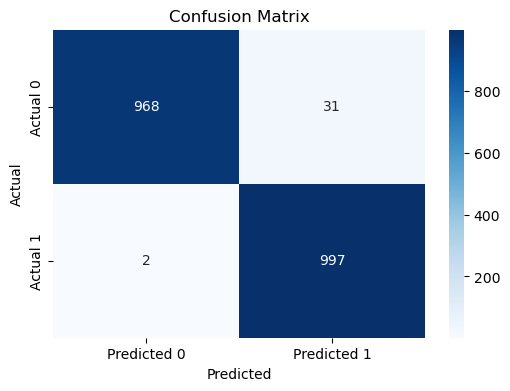

In [108]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
cm = confusion_matrix(y_test_class, predictions_class)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print("\nTrue Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Anomaly Detection

In [129]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1) Prepare your features
features = ['T1_remote_K', 'T2_embeded_K', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'DeltaT_K']
df_sub = df_pandas[features].dropna().copy()

# 2) Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sub)

# 3) Fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_scaled)

# 4) Predict anomalies (-1 = anomaly, 1 = normal)
anomaly_labels = iso_forest.predict(X_scaled)
df_sub['Anomaly_IF'] = anomaly_labels

# 5) Analyze results
df_anomalies = df_sub[df_sub['Anomaly_IF'] == -1]
print("Number of anomalies detected:", len(df_anomalies))


Number of anomalies detected: 300


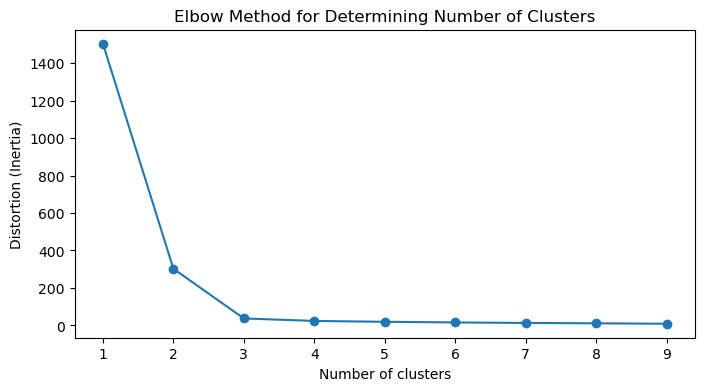

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the scaled feature vectors corresponding to the anomalies
X_anomalies = X_scaled[df_sub['Anomaly_IF'] == -1]

# Use the elbow method to identify a good number of clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_anomalies)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Determining Number of Clusters')
plt.show()


In [131]:
# Cluster anomalies into 3 groups using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_anomalies)

# Add the cluster labels back into the anomalies DataFrame
df_anomalies = df_sub[df_sub['Anomaly_IF'] == -1].copy()
df_anomalies['Cluster'] = cluster_labels

# Display counts of anomalies per cluster
print("Anomalies per Cluster:")
print(df_anomalies['Cluster'].value_counts())


Anomalies per Cluster:
Cluster
2    157
1     76
0     67
Name: count, dtype: int64


In [132]:
# Group anomalies by cluster and compute mean values for each feature
cluster_summary = df_anomalies.groupby('Cluster').mean()
print("\nCluster Summary (Mean Feature Values):\n", cluster_summary)


Cluster Summary (Mean Feature Values):
          T1_remote_K  T2_embeded_K  AbsFlow_Fb_m3s  AbsPower_Fb_W   DeltaT_K  \
Cluster                                                                        
0         349.944757    323.449125        0.002879  315482.791854  26.495631   
1         351.203217    324.493517        0.004025  444400.570485  26.709700   
2         349.951030    323.486881        0.000308   33722.872686  26.464149   

         Anomaly_IF  
Cluster              
0              -1.0  
1              -1.0  
2              -1.0  


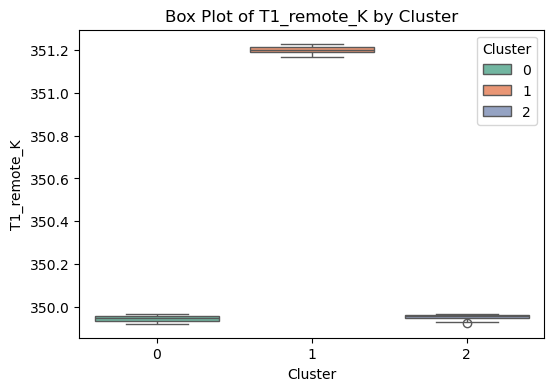

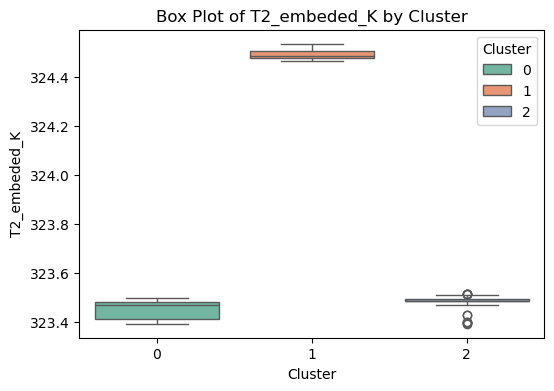

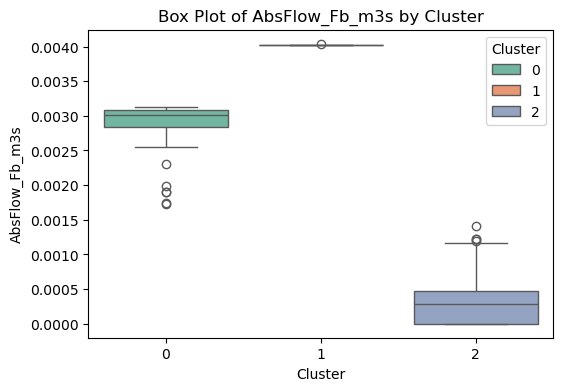

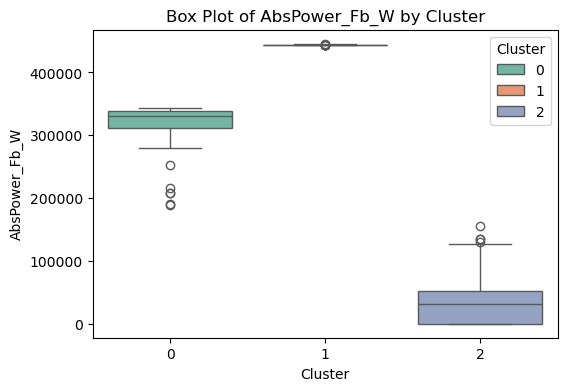

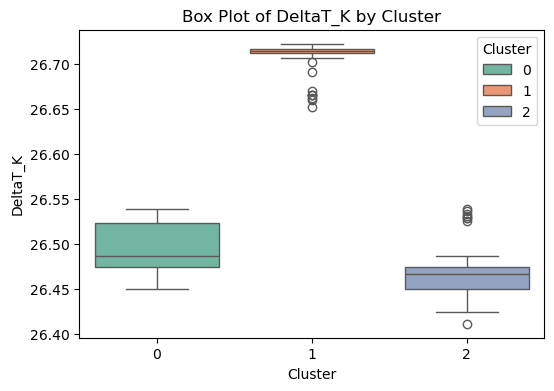

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['T1_remote_K', 'T2_embeded_K', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'DeltaT_K']
for feat in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', 
            y=feat, 
            hue='Cluster', 
            data=df_anomalies, 
            palette='Set2',
            dodge=False)
    plt.title(f'Box Plot of {feat} by Cluster')
    plt.show()


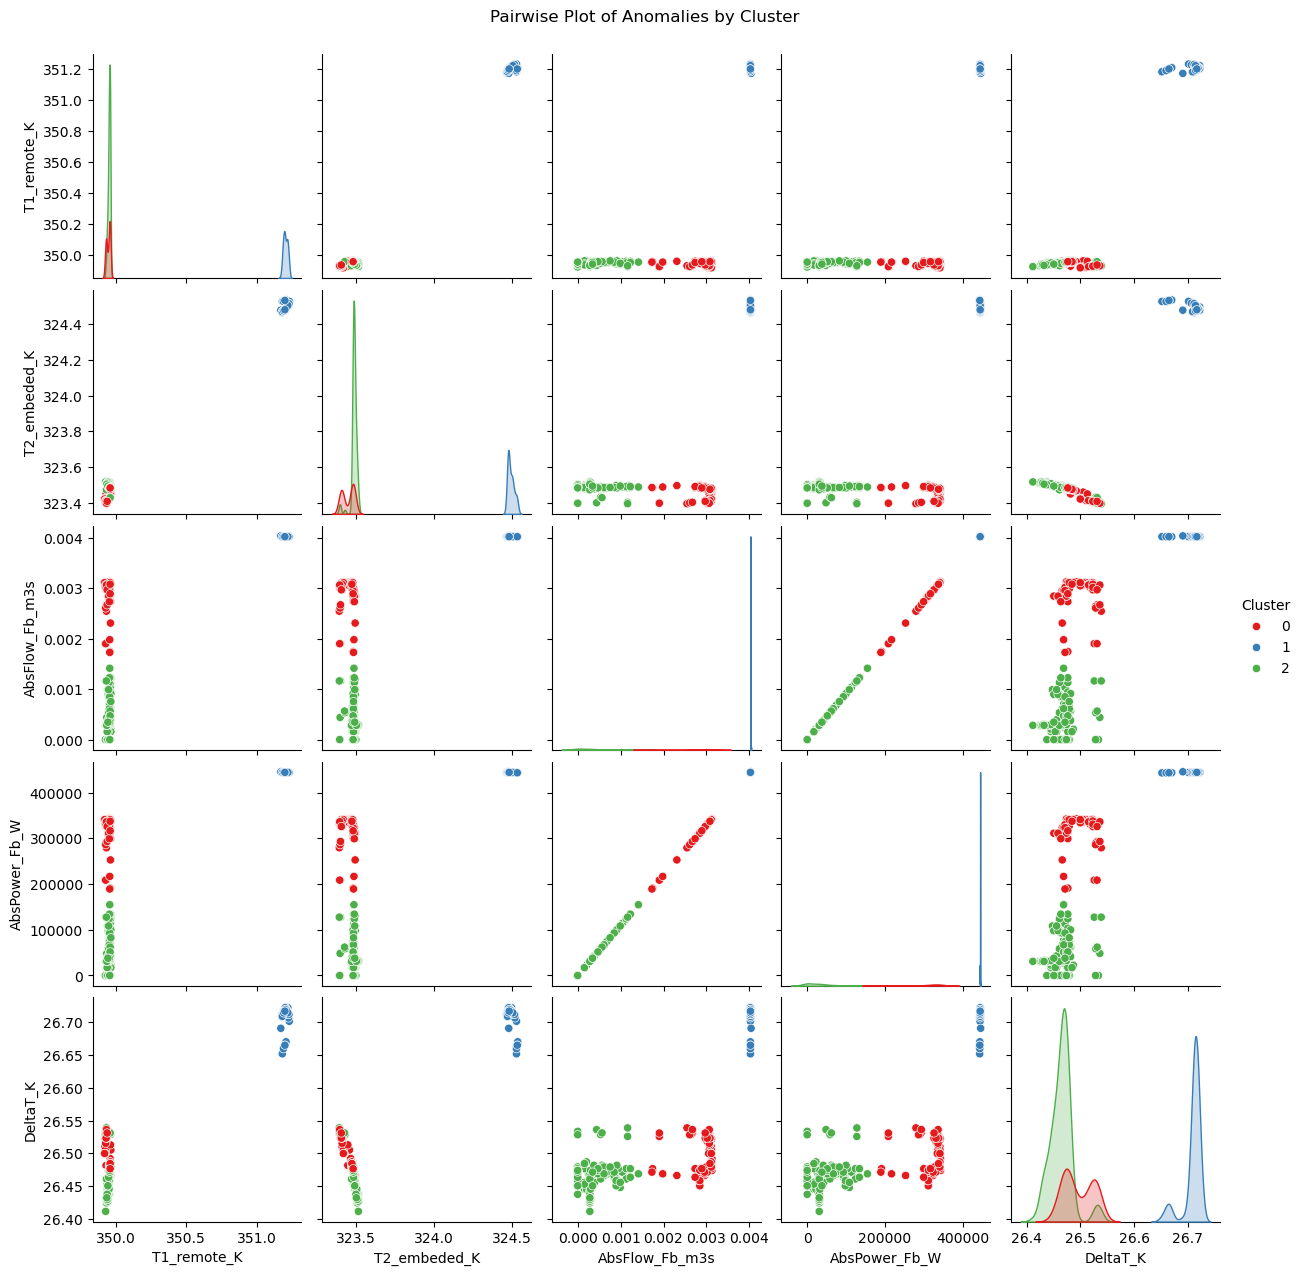

In [134]:
import seaborn as sns

# Pairplot to see pairwise relationships among features in anomalies
sns.pairplot(df_anomalies, hue='Cluster', 
             vars=features, 
             palette='Set1', diag_kind='kde')
plt.suptitle("Pairwise Plot of Anomalies by Cluster", y=1.02)
plt.show()

In [155]:
# Subset the DataFrame to include only rows in Cluster 1
df_cluster1 = df_anomalies[df_anomalies['Cluster'] == 1].copy()

# Check the number of rows
print("Number of rows in Cluster 1:", df_cluster1.shape[0])


Number of rows in Cluster 1: 76


In [157]:
# List of error labels
error_labels = [
    "T1_Err", "T2_Err", "Flow_Signal_Faulty", "Actuator_Stalled",
    "Flow_with_closed_Valve", "Airbubbles", "V_Dmd_nReached", "P_Dmd_nReached",
    "BPosG", "RevFlow", "MP2_nAlive", "FreezeWarn"
]

# Merge error columns from df_pandas into df_anomalies using the index.
# This assumes that df_anomalies' index corresponds to df_pandas' index.
df_anomalies = df_anomalies.merge(df_pandas[error_labels], left_index=True, right_index=True, how='left')

# Verify that the error columns are now present in df_anomalies:
print("Columns in df_anomalies after merge:", df_anomalies.columns.tolist())


Columns in df_anomalies after merge: ['T1_remote_K', 'T2_embeded_K', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'DeltaT_K', 'Anomaly_IF', 'Cluster', 'T1_Err', 'T1_Err', 'T1_Err', 'T2_Err', 'T2_Err', 'T2_Err', 'Flow_Signal_Faulty', 'Flow_Signal_Faulty', 'Flow_Signal_Faulty', 'Actuator_Stalled', 'Actuator_Stalled', 'Actuator_Stalled', 'Flow_with_closed_Valve', 'Flow_with_closed_Valve', 'Flow_with_closed_Valve', 'Airbubbles', 'Airbubbles', 'Airbubbles', 'V_Dmd_nReached', 'V_Dmd_nReached', 'V_Dmd_nReached', 'P_Dmd_nReached', 'P_Dmd_nReached', 'P_Dmd_nReached', 'BPosG', 'BPosG', 'BPosG', 'RevFlow', 'RevFlow', 'RevFlow', 'MP2_nAlive', 'MP2_nAlive', 'MP2_nAlive', 'FreezeWarn', 'FreezeWarn', 'FreezeWarn']


Error Summary by Cluster:
          T1_Err  T1_Err  T1_Err  T2_Err  T2_Err  T2_Err  Flow_Signal_Faulty  \
Cluster                                                                       
0             0       0       0       0       0       0                   0   
1             0       0       0       0       0       0                   0   
2             0       0       0       0       0       0                  21   

         Flow_Signal_Faulty  Flow_Signal_Faulty  Actuator_Stalled  ...  BPosG  \
Cluster                                                            ...          
0                         0                   0                 0  ...      0   
1                         0                   0                 0  ...      0   
2                        21                  21                 0  ...      0   

         RevFlow  RevFlow  RevFlow  MP2_nAlive  MP2_nAlive  MP2_nAlive  \
Cluster                                                                  
0              0       

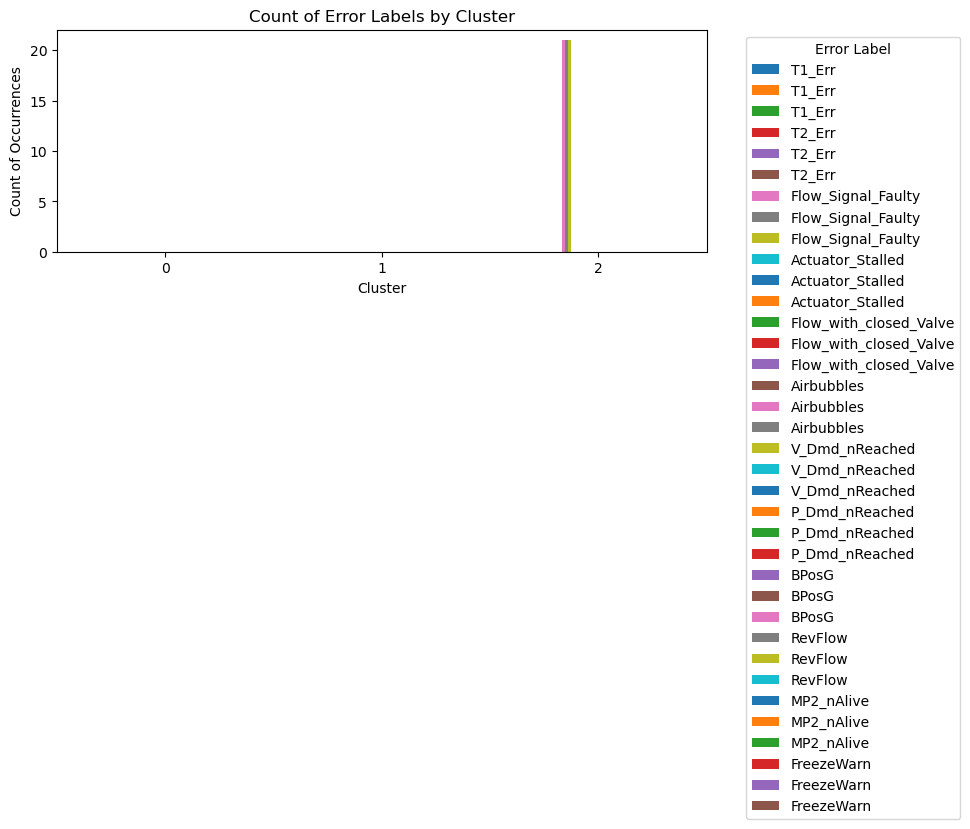

In [158]:
# Group by the 'Cluster' column and sum the error indicator columns
error_summary = df_anomalies.groupby('Cluster')[error_labels].sum()
print("Error Summary by Cluster:\n", error_summary)

# Visualize the summary as a bar chart
error_summary.plot(kind='bar', figsize=(10, 6))
plt.title("Count of Error Labels by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count of Occurrences")
plt.xticks(rotation=0)
plt.legend(title='Error Label', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [154]:
# Function to convert error number to bit string
def error_to_bit_string(error_value, num_bits=12):
    return format(int(error_value), f'0{num_bits}b')[::-1]  # Convert to binary & reverse bits

# Apply conversion to DataFrame
df_anomalies["Error_Bit_String"] = df_anomalies["Error_Status_Cloud"].fillna(0).apply(error_to_bit_string)

# Show results
df_anomalies[["Error_Status_Cloud", "Error_Bit_String"]].head()


KeyError: 'Error_Status_Cloud'

In [153]:
# Define error labels based on bit positions
error_labels = [
    "T1_Err", "T2_Err", "Flow_Signal_Faulty", "Actuator_Stalled",
    "Flow_with_closed_Valve", "Airbubbles", "V_Dmd_nReached", "P_Dmd_nReached",
    "BPosG", "RevFlow", "MP2_nAlive", "FreezeWarn"
]

print("Columns in df_pandas:", df_pandas.columns.tolist())

# Function to decode errors
def decode_errors(bit_string):
    return {error_labels[i]: int(bit_string[i]) for i in range(len(error_labels))}

# Apply decoding function
error_df = df_anomalies["Error_Bit_String"].apply(decode_errors).apply(pd.Series)

# Merge with main DataFrame
df_anomalies = pd.concat([df_anomalies, error_df], axis=1)

# Show results
df_anomalies.head()

Columns in df_pandas: ['device_id', 'dataprofile_id', 'cloud_received_time', 'sample_time', 'year', 'year_month', 'year_month_day', 'influx_migration_source_filename', 'T1_remote_K', 'T2_embeded_K', 'RelFlow_Fb_Rel2Vmax', 'RelPower_Fb_Rel2Pmax', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'Heating_E_J', 'Glycol_Concentration_Rel', 'ControlMode_Write', 'Cooling_E_J', 'RelPos_Fb', 'DeltaT_Limitation_Write', 'SpDeltaT_K_Write', 'Pmax_Rel_Write', 'Vmax_Rel_Write', 'InstallationPosition_Write', 'Override_Write', 'DN_Size', 'SpFlow_DeltaT_lmin_Write', 'DDC_Sp_Rel', 'SpDeltaT_applied_K', 'Error_Status_Cloud', 'DDC_BUS_Sp_Write', 'dT_Manager_Ste', 'Active_dT_Manager_total_h', 'DeltaT_K', 'DDC_Sp_V', 'OperatingHours', 'Flow_Volume_total_m3', 'Y3AnalogInputValue', 'Error_Bit_String', 'T1_Err', 'T2_Err', 'Flow_Signal_Faulty', 'Actuator_Stalled', 'Flow_with_closed_Valve', 'Airbubbles', 'V_Dmd_nReached', 'P_Dmd_nReached', 'BPosG', 'RevFlow', 'MP2_nAlive', 'FreezeWarn', 'T1_Err', 'T2_Err', 'Flow_Signal_Fault

KeyError: 'Error_Bit_String'

In [146]:
# 1) Group by cluster and sum the error columns
error_summary = df_pandas.groupby('Cluster')[error_labels].sum()
print("Error Summary by Cluster:\n", error_summary)

# 2) Visualize as a bar chart
error_summary.plot(kind='bar', figsize=(10, 6))
plt.title("Count of Error Labels by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count of Occurrences")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Error Label', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

KeyError: 'Cluster'

In [122]:
df_anomalies_with_time = df_pandas[df_pandas['Anomaly_IF'] == -1].copy()
df_anomalies_with_time['Cluster'] = cluster_labels  # from the KMeans step

# Plot anomaly occurrences over time
df_anomalies_with_time['sample_time'] = pd.to_datetime(df_anomalies_with_time['sample_time'])
df_anomalies_with_time.set_index('sample_time', inplace=True)

for c in df_anomalies_with_time['Cluster'].unique():
    cluster_data = df_anomalies_with_time[df_anomalies_with_time['Cluster'] == c]
    plt.scatter(cluster_data.index, [c]*len(cluster_data), label=f'Cluster {c}', alpha=0.7)

plt.title("Anomaly Clusters Over Time")
plt.xlabel("Time")
plt.ylabel("Cluster Label")
plt.legend()
plt.show()

KeyError: 'Anomaly_IF'

In [112]:
from sklearn.svm import OneClassSVM

oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
oc_svm.fit(X_scaled)

svm_labels = oc_svm.predict(X_scaled)
# Convert SVM labels (1, -1) to a more user-friendly form
df_sub['Anomaly_OCSVM'] = svm_labels
df_sub['Anomaly_OCSVM'] = df_sub['Anomaly_OCSVM'].map({1: 0, -1: 1})  # 1 = anomaly

print(df_sub['Anomaly_OCSVM'].value_counts())


Anomaly_OCSVM
0    9900
1      99
Name: count, dtype: int64


In [113]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Points labeled -1 by DBSCAN are considered outliers
df_sub['Anomaly_DBSCAN'] = (dbscan_labels == -1).astype(int)


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(window_size, n_features), return_sequences=False))
model.add(RepeatVector(window_size))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))

model.compile(optimizer='adam', loss='mse')


NameError: name 'n_features' is not defined